# Introduction to Regression with statsmodels in Python

### Regression

- A statistical tool to analyze the relationship between two variables
- They are a class of statistical models that explore the relationship between some response varible and some explanatory variable

### Jargon:

#### Response Variable:
- The dependent variable
- The variable that we want to predict
#### Explanatory Variable:
- The independent variable
- The variables that explain how the response variable will change

### Linear Regression and Logistic Regression

- Linear regression is used when the response variable is numeric
- Logistic regression is used when the response variable is logical




### Fitting a Linear Regression

- Linear Regressions are defined by a straight line
- Straight lines are defined by two things:

1) Intercept
2) Slope


- Equation:

y = intercept + (slope*x)

### Ordinary Least Squares(OLS)
- It is a type of commonly used regression

#### Residuals
- Residuals represent the difference between observed values and the predicted values.

- The goal of OLS is to find the line that minimises the sum of the squared residuals, effectivly finding the best fit for the data
- By squaring the residuals, we emphasize the impact of larger errors and ensure a balances consideration of positive and negative deviations form the linear regression model

In [ ]:
# Running a linear regression model
from statsmodels.formula.api import ols
#ols - Ordinary Least Squares
# Response variable is writen to the left of the tilde and the explanatory variable is writen to the right
mdl_payment_vs_claims = ols("total_payment_sek ~ n_claims", data = swedish_motor_insurance)
mdl_payment_vs_claims = mdl_payment_vs_claims.fit()

#The params argument results in the intercepts and the slope of the line
print(mdl_payment_vs_claims.params)

### Categorical Explanatroy Variables

- Histograms are more suitable for ploting categorical data

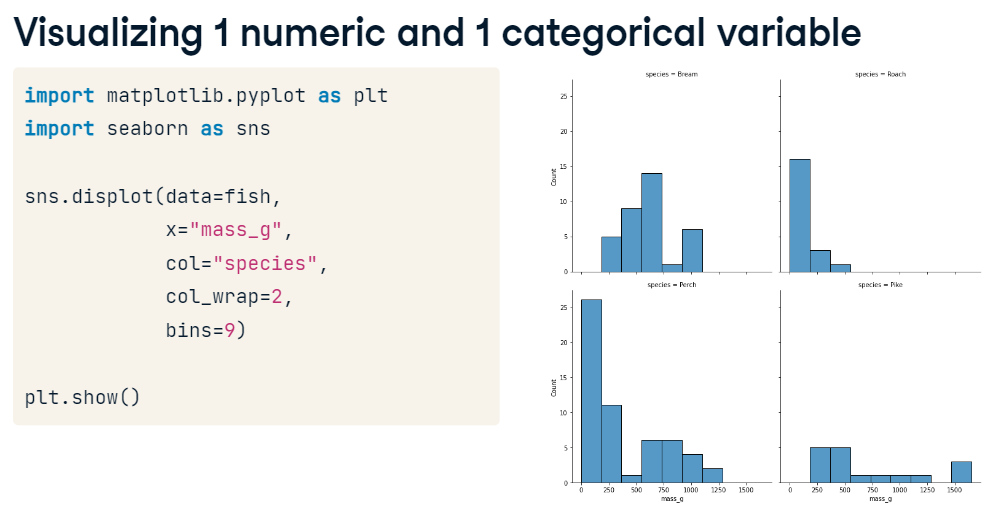

In [ ]:
# Running a linear regression on fish data with mass as the response variable and species as the explanatory variable

mdl_mass_vs_species = ols("mass_g ~ species", data = fish).fit()
print(mdl_mass_vs_species.params)

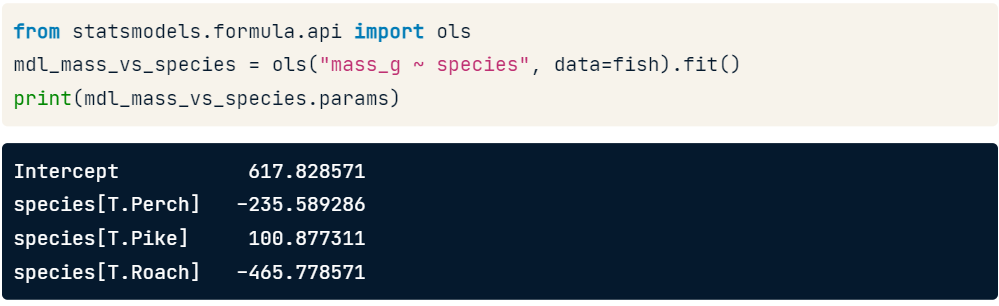

- We get 4 params - one for the intercept and three for the slopes of each species
- The intecept is the mean mass for the bream
- The coefficients for each category are relative to the intercept which is why some are negative. This can be changed by modifying the code as follows.

In [ ]:
# Modeling the linear regression without an intercept term due to which the params are not relative to the intercept

mdl_mass_vs_species = ols("mass_g ~ species + 0 ", data = fish).fit()
print(mdl_mass_vs_species.params)

Looking at the data of a single species of a fish - bream
- Predicting mass of the fish using its length

- The principle behind predcting is to ask the question if I set the explanatory variables to these values, then what is the value of the response variable?


In [ ]:
# Predicting mass of the fish using its length
mdl_mass_vs_length = ols("mass_g ~ length_cm").fit()
# Looking at the parameters
print(mdl_mass_vs_length.params)

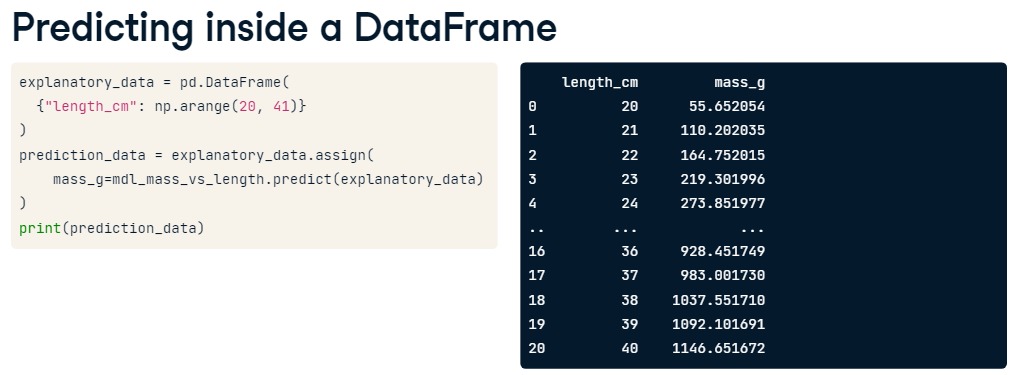

In [ ]:
# Predicting new response variable values from new explanatory variables

# Determining the new explanatory variables
explanatory_data = pd.DataFrame({"length_cm": np.arange(20, 41)} )
# calling the predict() method
print(mdl_mass_vs_length.predict(explanatory_data))

# Predicting the data as a new column in a DataFrame
prediction_data = explanatory_data.assign(mass_g = mdl_mass_vs_length.predict(explanatory_data)

### Extrapolating

- Making predictions outside the range of observed data
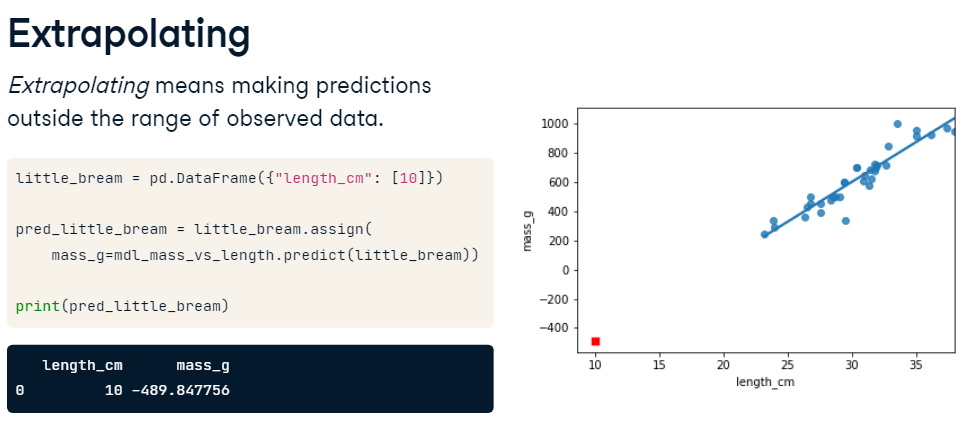

- Extrapolating data can lead to misleading data

In [ ]:
# Extrapolating data for a 10cm bream
little_bream = pd.DataFrame({"length_cm": [10]})

pred_little_bream = little_bream.assign(mass_g = mdl_mass_vs_length.predict(explanatory_data))
print(pred_little_bream)

### Working with model objects

1) .params attribute
-gives the coefficients and the intercepts

2) .fittedvalues attribute
- jargon for predictions on the orignal datasets
- shortcut for taking the explanatory values from the dataset and feeding them to the predict function
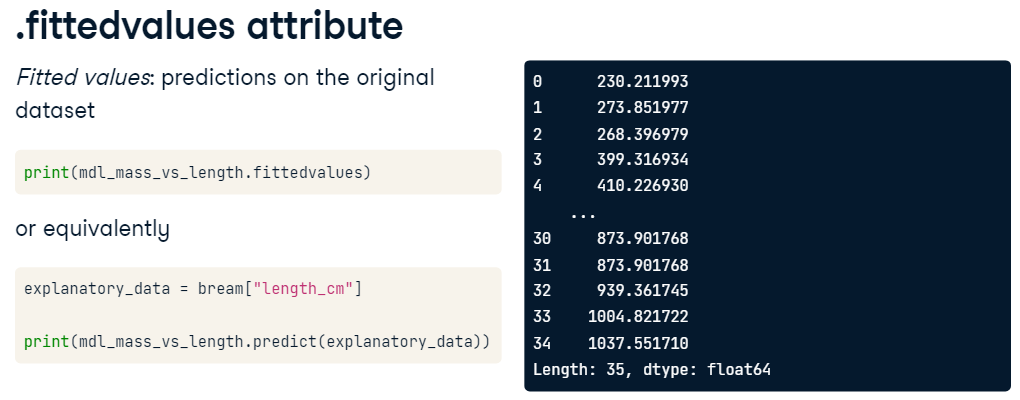

3) .resid attribute
- Actual response values minus the predicted response values
- It is the measure of inaccuracy in a model fit

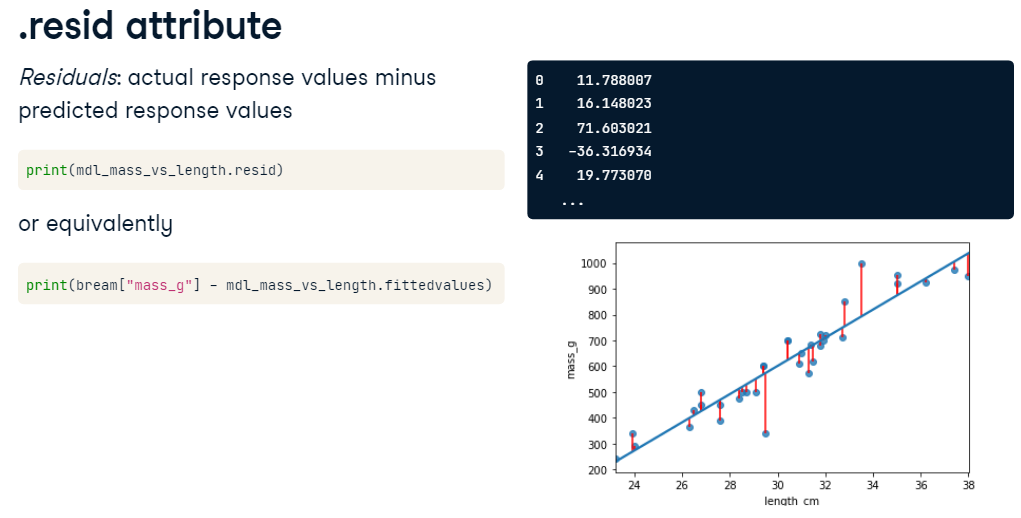

4) .summary attribute
- Shows a more extended printout of the details of the model


In [ ]:
# 1) .params attribute
mdl_mass_vs_length = ols("mass_g ~ length_cm", data = bream).fit()
print(mdl_mass_vs_length.params)

# 2) .fittedvalues attribute
print(mdl_mass_vs_length.fittedvalues)

# 3) .resid attribute
print(mdl_mass_vs_length.resid)

# 4) .summary attribute
mdl_mass_vs_length.summary()

### Regression to the mean

- Regression to the mean is a property of the data and not a model
- We know that Residual = Response Vaule - fitted Value 
- Thus, Response value = fitted Value + Residual
- i.e. The response value represent "the stuff you explained" + "the stuff you could not explain"

### Reasons why residuals exist

1) The model is not good enough(often the case in simple linear regression)

2) Fundamental randomness. Extreme cases are often due to randomness i.e. the extremes dont persist over time


-Regression to the mean means extreme cases dont persist over time

- Scatter plot showing the sons heights in comparrision to the fathers heights

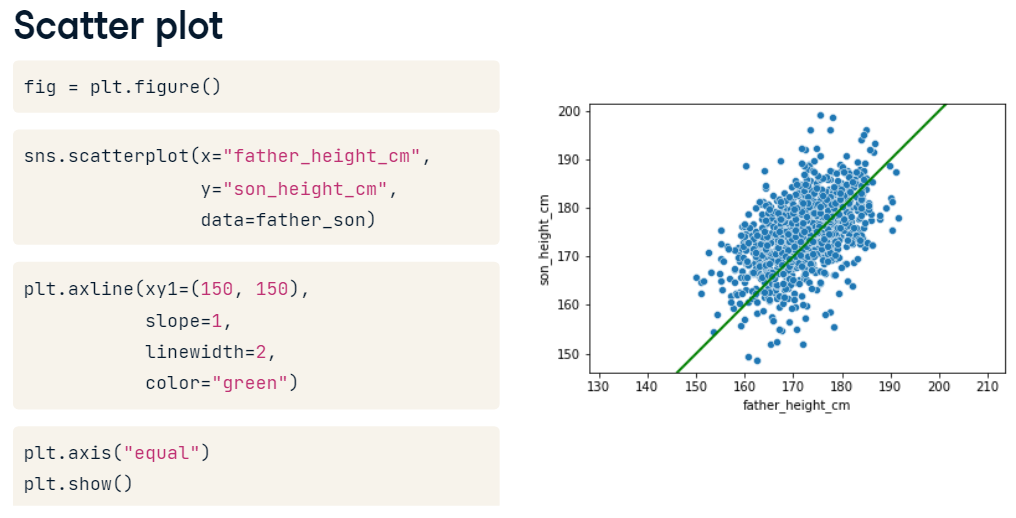

- Adding a regression line

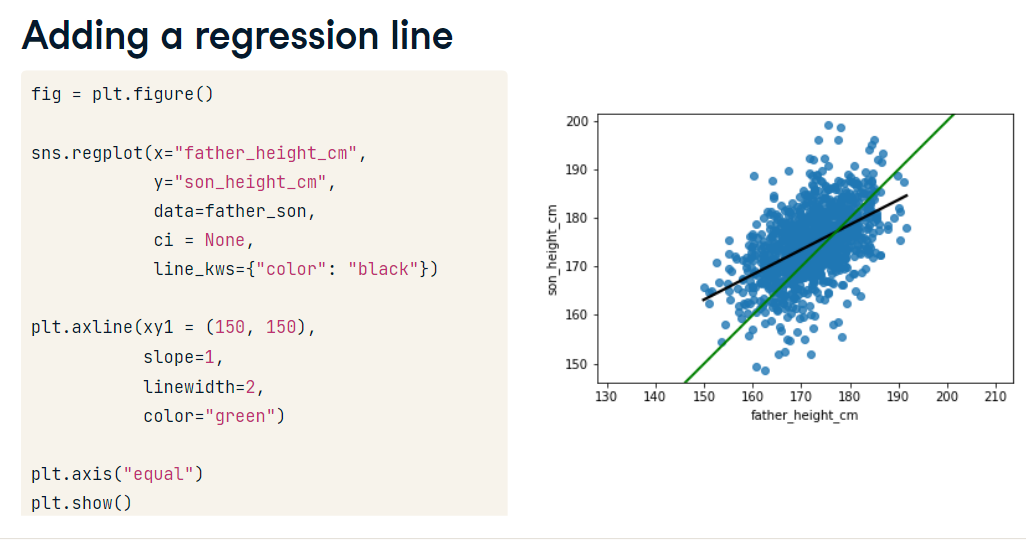

-On the left of the plot, the black line is above the green line, suggesting that for very short fathers, their sons are taller than them on average. On the far right of the plot, the black line is below the green line, suggesting that for very tall fathers, their sons are shorter than them on average.


### Transforming Variables

- Sometimes, the relationship between the explanatory variables and the response variables may not be a straight line eg: the relationship between the length and mass of the perch(another species of fish)

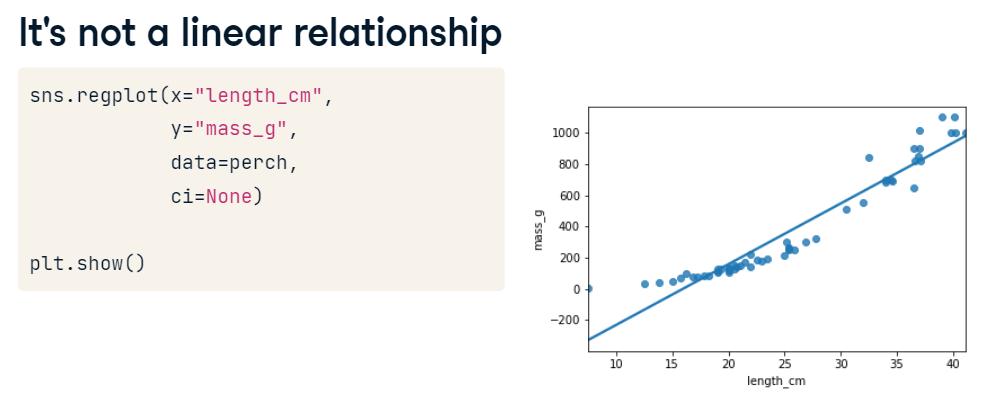

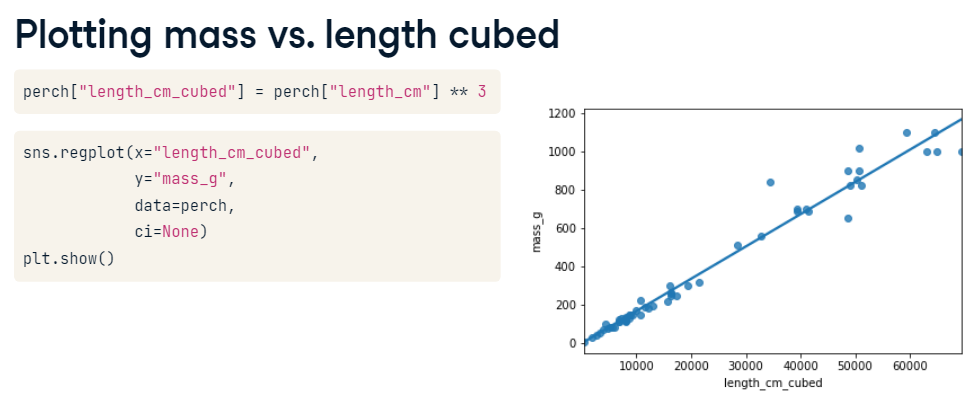

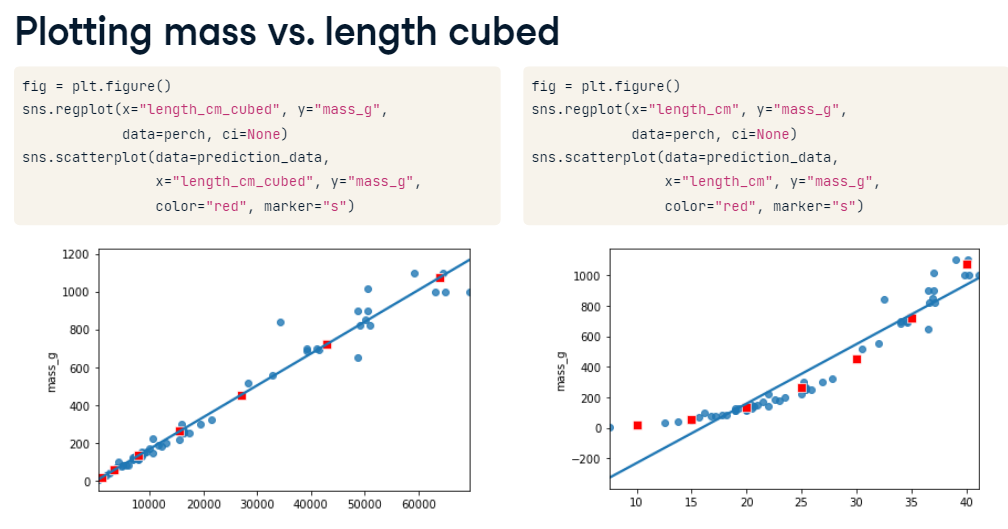

- Square roots are a common transformation when the data is right skewed


In [ ]:
# Transforming Variables

# Plotting mass vs length cubed
perch['length_cm_cubed'] = perch['length_cm'] ** 3

sns.regplot(x = "length_cm_cubed", y = "mass_g", data = perch, ci = None)
plt.show()

# Modeling the transformation
mdl_perch = ols("mass_g ~ length_cm_cubed", data=perch).fit()
mdl_perch.params

# Creating an Explanatory dataset of unexplored data[Extrapolating]
explanatory_data = pd.DataFrame({"length_cm_cubed":np.arange(10, 41, 5) ** 3, "length_cm":np.arange(10, 41, 5)})

# Adding predictions to the dataframe
prediction_data = explanatory_data.assign(mass_g = mdl_perch.predict(explanatory_data))



# Quantifying Model Fit

1) Coefficient of determination(R^2):

- The proportion of the variance in the response variable that is predictable from teh explanatory variable
- 1 means perfect fit
- 0 means worst possible fit
- This is also showed by the .summary method
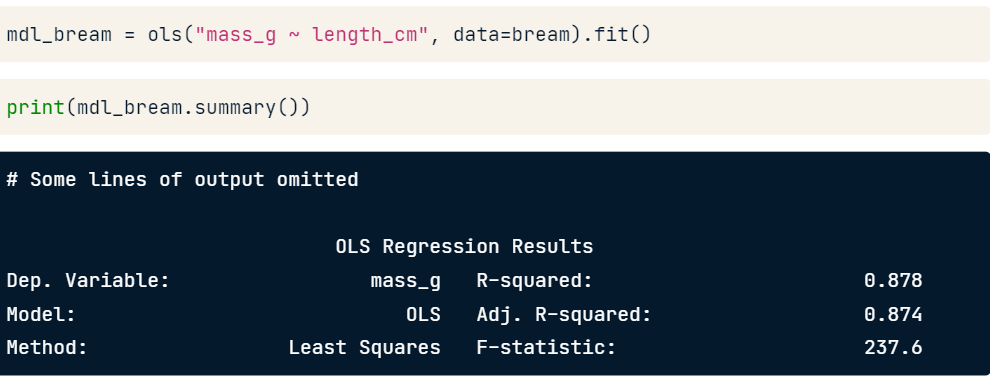

-computed using the .rsquared attribute
- R squared is the correlation between the explanatory and the response variable squared

In [ ]:
# Coeffecient of Determination(R^2)
mdl_bream = ols("mass_g ~ length_cm", data = bream).fit()
print(mdl_bream.summary())
# the rsquared attribute
print(mdl_bream.rsquared)
# Determining the coefficient of determination
coeff_determination = bream['length_cm'].corr(bream['mass_g'])**2
print(coeff_determination)


2) Residual Standard Error(RSE)

- A residual is the difference between the predicted value and the observed value
- It has the same unit as the response variable
- Degrees of freedom equals the number of observations minus the number of model coefficients
- Mean Squared Error(MSE) is RSE squared
- An rse of 74 means that the difference between the predicted bream masses and observed bream masses is typically 74g
- RMSE is calculated in the same way other than we dont subtract the number of coeffieients from the degree of freedom



In [ ]:
# Calculating RSE

# Taking the square of each residual
residuals_sq = mdl_bream.resid ** 2
# Taking the sum of each residual squared
resid_sum_if_sq = sum(residuals_sq)
# Calculating the degrees of freedom of the sum of residuals squared
deg_freedom = len(bream.index) - 2
# Square root of the ratio of residual sum of squares and degrees of freedom
rse = np.sqrt(resid_sum_if_sq/deg_freedom)

print("RSE: ", rse)

# Caclculating MSE
# MSE - Mean Squared Error
mse = mdl_bream.mse_resid
rse == np.sqrt(mse)




### Root Mean Squared Error

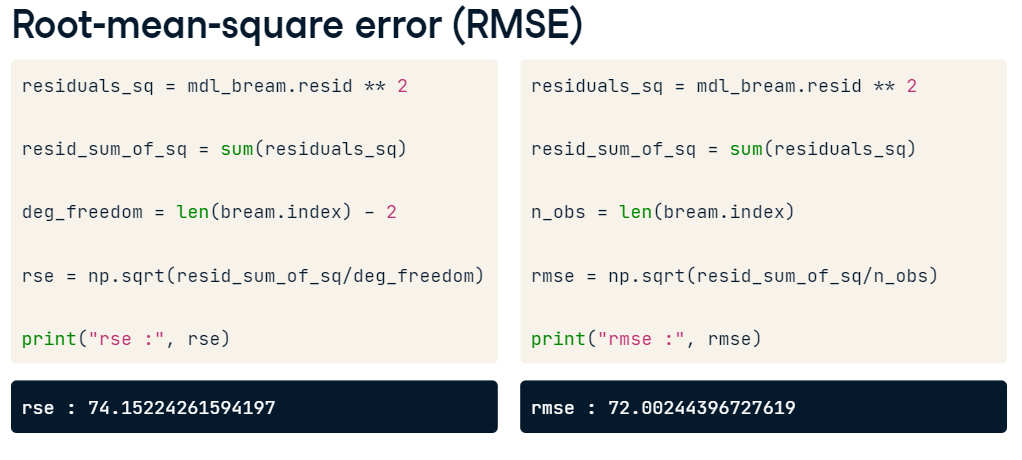

- RMSE is calculated in the same way other than we dont subtract the number of coeffieients from the degree of freedom


### Visualizing Model Fit

- If a linear regression model is a good fit, then the residuals are usually normally distributed
- The mean of the residuals is zero

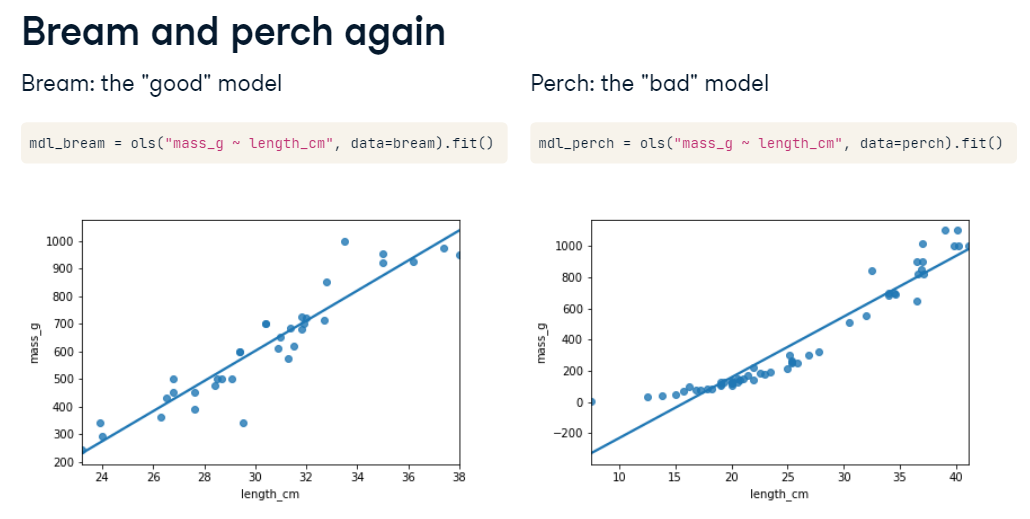

1) Residuals vs Fitted Values

- Not useful for making predictions
- Useful for visualizing trends
- If residuals met the assumption that they are normaly distribued with the mean 0 then the trend line should closely follow y = 0

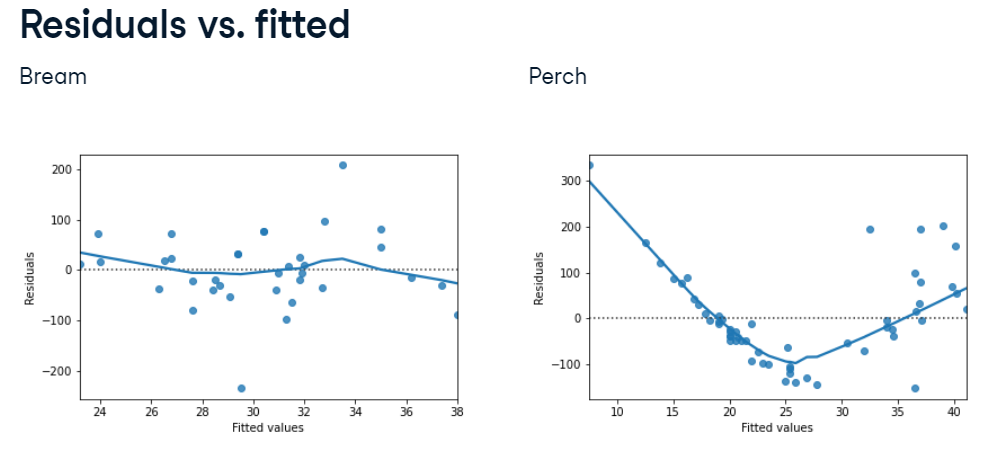

2) Q-Q Plot:

- It shows if the residuals follow the normal distribution
- If the points track along the straight line, then they are normally distributed, Else, they are not.

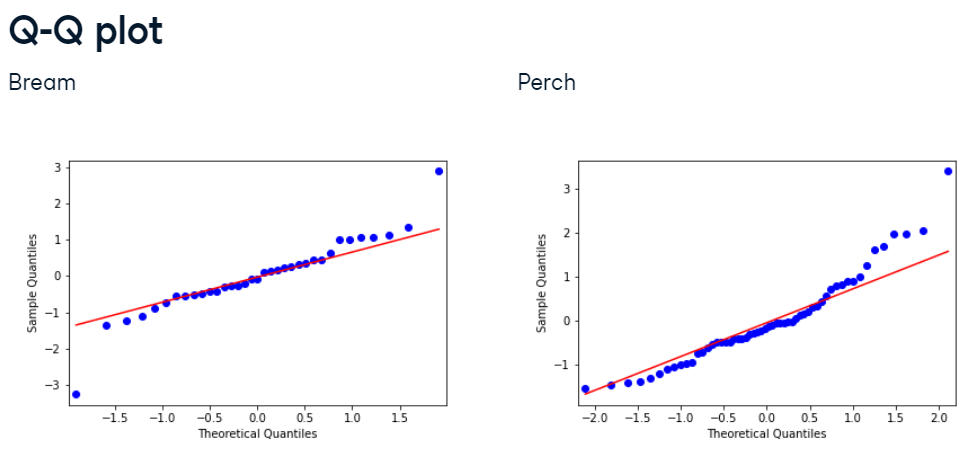

3) Scale-location plot
- shows if the size of the residuals gets bigger or smaller

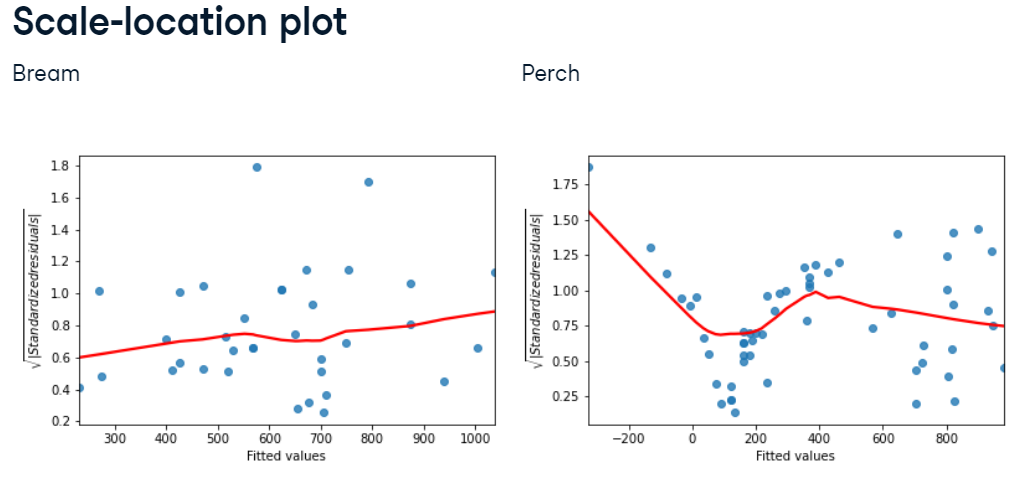

In [ ]:
# 1) Residuals vs Fitted Values
sns.residplot(x = "length_cm", y = "mass_g", data = bream, lowess = True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# 2) Q-Q Plot:
from statsmodels.api import qqplot
# line argument is optional
qqplot(data = mdl_bream.resid, fit = True, line = "45")

# 3) Scale-location plot
model_norm_residuals_bream = mdl_bream.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt_bream = np.sqrt(np.abs(model_norm_residuals_bream))
sns.regplot(x = mdl_bream.fittedvalues, y = model_norm_residuals_abs_sqrt_bream, ci = None, lowess = True)
plt.xlabels("Fitted Values")
plt.ylabels("Sqrt of abs val of stdized residuals")

### Outliers, Leverage and Influence

- Looking at the "roach" species in the fish dataset

#### Outliers:
1) Data values that are extreme

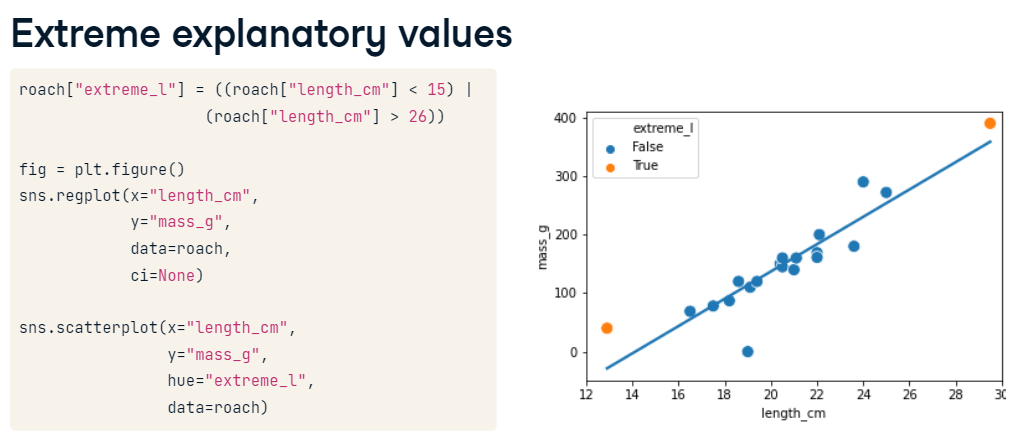

2) Response values awat from the regression line

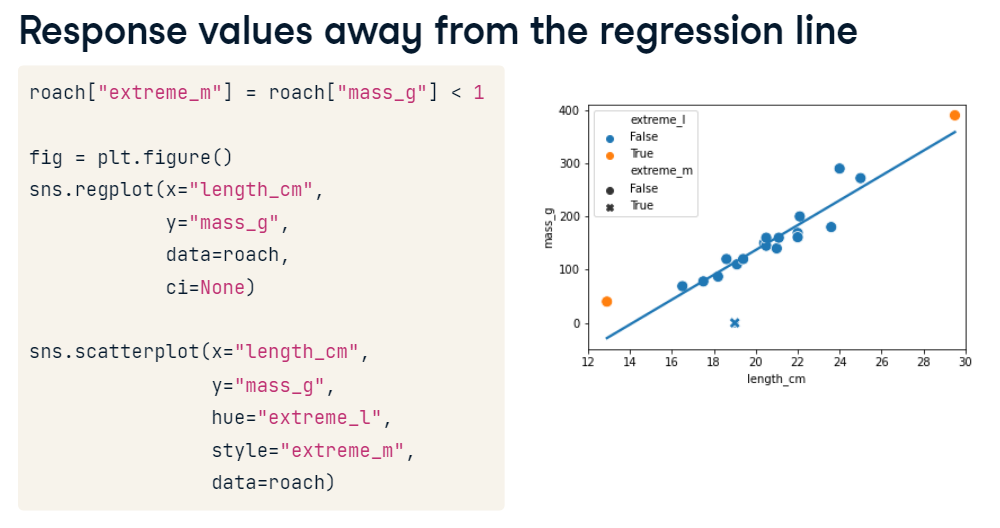

#### Leverage
- Quantifies how extreme the explanatory values are
- Used to detect outliers of the first kind in the above para
- for historical reasons, leverage is described in the "hat matrix"
- The values for leverage are stored in the "hat_diag" column of the summary_frame

#### Influence
- Measures how much the model would change is we rerun it witout a particular observation
- Influence is based on the size of the residuals and the leverage
- Cook's distance is the most common measure of influence


In [ ]:
# Outliers

# Leverage
mdl_roach = ols("mass_g ~ length_cm", data = roach).fit()
summary_roach = mdl_roach.get_influence().summary_frame() 
roach["leverage"] = summary_roach["hat_diag"]

# Influence
roach['cooks_dist'] = summary_roach["cooks_d"]
# Finding the most influental roaches by arranging the roaches by descending cooks distance values

### Logistic Regression

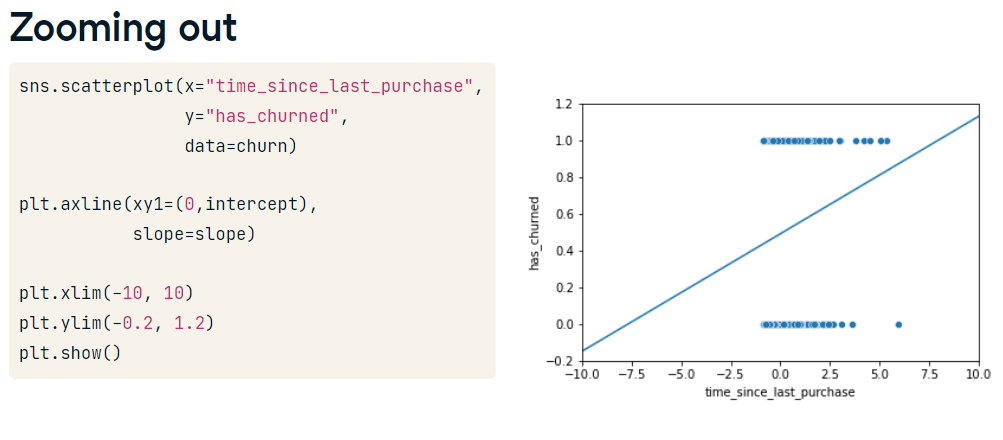

- The bottom left of the plot shows negative probabilites and top right of the plot shows probabilities greater than 1. Both of these situations are impossible

- Solution is to use logistic Regression instead of Linear Regression



In [ ]:
# Logistic Regression

from statsmodel.formula.api import logit
mdl_churn_vs_recency_logit = logit("has_churned ~ time_since_last_purchase", data = churn).fit()
print(mdl_churn_vs_recency_logit.params)

# Visualizing the model
sns.regplot(x = "time_since_last_purchase", y = "has_churned", data = churned, ci = None, logistic = True)
plt.axline(xy1 = (0, intercept), slope = slope, color = "black")
plt.show()
    

### Making Predictions using Logistic Regression


In [ ]:
# Making Predictions using Logistic Regression

mdl_recency = logit("has_churned ~ time_since_last_purchase", data = churn).fit()
explanatory_data = pd.DataFrame({"time_since_last_purchase": np.arange(-1, 6.25, 0.25)})
prediction_data = explanatory_data.assign(has_churned = mdl_recency.predict(explanatory_data))

### Getting the most likely outcome

- If the probability of an event taking place is less than 0.5 then the event most likely wont take place.
- Consequently, If the probability of an event taking place is greater than 0.5 then the event most likely will take place.
- This is calculated by rounding off the probabilities to 0 or 1.

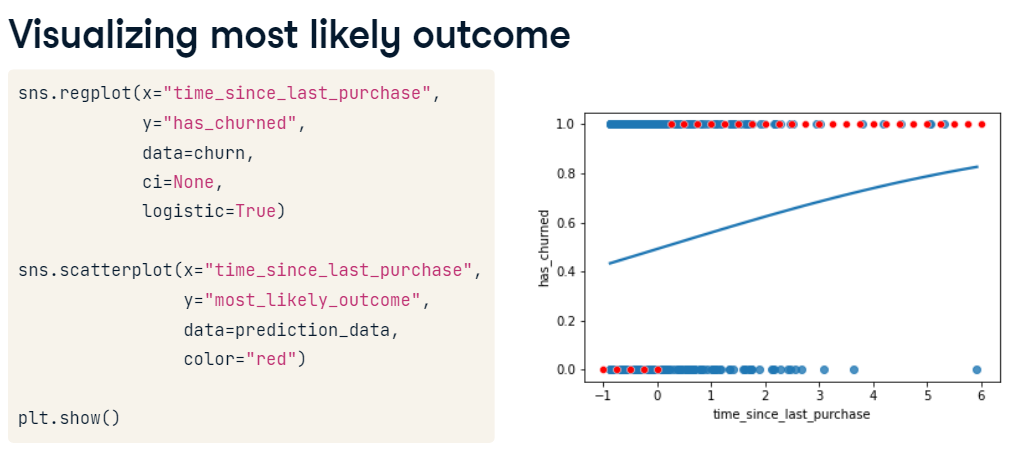

In [ ]:

prediction_data = explanatory_data.assign(has_churned = mdl_recency.predict(explanatory_data))
prediction_data['most_likely_outcome'] = np.round(prediction_data['Has_churned'])


### Odds Ratio

- Odds ratio is the probability of something hapenning divided by probability of something not happening

- odds_ratio = probability / (1 - probability)
- A property of logistic regression odds ratios is that on the logarithmic scale, they plot out linearly



In [ ]:
# Calculating Odds Ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

# Visualizing Odds Ratio
sns.lineplot(x = "time_since_last_purchase", y = "odds_ratio", data = prediction_data)
plt.axhline(y = 1, linestyle = "dotted")
plt.yscale("log")

# Calculating Log Odds Ratio
prediction_data['log_odds_ratio'] = np.log(prediction_data['odds_ratio'])



### Quantifying Logistic Regression Fit

- Diagonostic plots from linear regression are not useful for linear regression

#### 1) Confussion matrix:

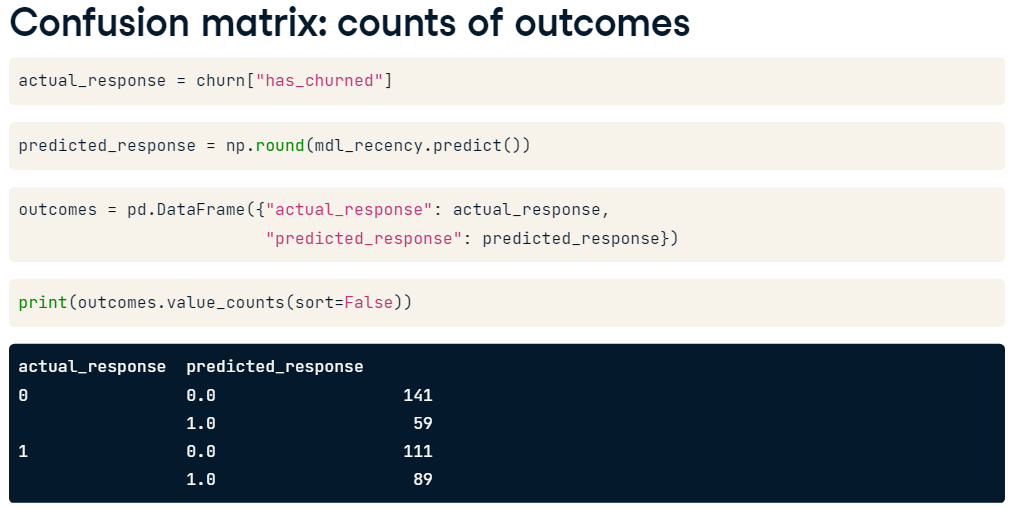

In [ ]:
# 1) Confussion matrix:

actual_response = churn["has_churned"]
predicted_responses = np.round(mdl_recency.predict())

# Combining the actual and predicted responses in a dataframe
outcomes = pd.DataFrame({"actual_response":actual_response, "predicted_response": predicted_responses})

# Making a confussion matrix
print(outcomes.value_counts(sort = False))

# Visualizing the confussion matrix
conf_matrix = mdl_recency.pred_table()
print(conf_matrix)

# Visualizing the confussion matrix using the mosaic function
from statsmodels.graphics.mosaicplot import mosaic
mosaic(conf_matrix) 


#### 2) Accuraccy

- It is the proportion of correct predictions
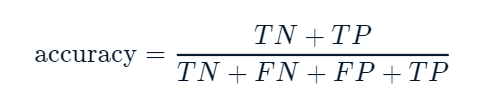

#### 3) Sensitivity
- It is the proportion of observations where the actual repsonses was True and the model also predicted that they were True
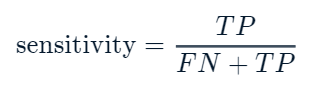

#### 4) Specificity
- It is the proportion of observations where the actual repsonses was False and the model also predicted that they were False
- Higher specificity is better
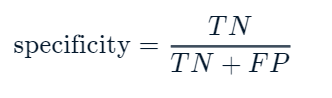


In [ ]:
# 2) Accuraccy
TN = conf_matrix[0, 0]
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
FP = conf_matrix[0, 1]

accuracy = (TN + TP) / ( TN + TP + FP + FN )

# 3) Sensitivity

sensitivity = TP / (FN + TP)

# 4) Specificity

specificity = TN / (FP + TN)

